### Import variables from Step 1 Transformation Step
More info on "Stores variables, aliases and macros in IPython’s database." Follow the link: <a href="https://ipython.org/ipython-doc/rel-0.12/config/extensions/storemagic.html">IPython Documentation</a> 

In [1]:
%store -r nationals
%store -r astros

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
%matplotlib inline

In [3]:
# Display all columns (pandas will collapse some columns if we don't set this option)
pd.set_option('display.max_columns', None)

### Determine which player had the highest HR scores for each team

<Strong>Method</Strong>
 - Sort home run values for each team
 - Store player names and their home run values in lists
 - Use a scatter plot to visualize the home run hits by team

In [4]:
# Sort the dataframe by the home runs column using the .sort_values() method
astros = astros.sort_values(by=['HR'])
nationals  = nationals.sort_values(by=['HR'])

In [5]:
# Prepare a list for each team that has a) player name, and b) the home runs
# This general code will create a list of the data needed for 2d plotting: dataframe.column.values
astros_players = astros.Name.values
astros_home_runs = astros.HR.values
nationals_players = nationals.Name.values
nationals_home_runs = nationals.HR.values

# Exploratory Data Analysis

### Use pandas plotting methods to visualize the home run data

### Question 1: What is the batter home run distribution for both teams?

<strong>Method:</strong> 
 - Use pandas .plot() method to view the HR distribution for the Astros and Nationals.
Use 
will use a horizontal boxplot to compare the HR distribution for the astros and nationals
 - Which team has the highest number of players with more home runs?
 - Which team has the highest average home runs?
 - Variables
 - x will be the homerunds
 - y will be the categories: Nationals, Astros

#### Box Plot to compare both teams

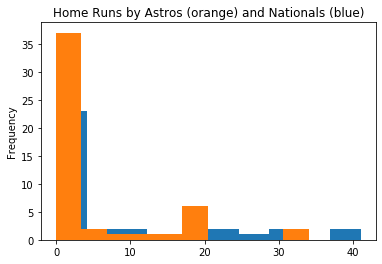

In [6]:
astros.HR.plot(kind='hist', title="Home Runs by Astros (orange) and Nationals (blue)")
nationals.HR.plot(kind='hist')
plt.show()

<strong>Observation</strong>
It appears as if the Nationals had more batters hit home runs > 20.

In [7]:
# Store homeruns by team into a series
astros_series = astros['HR'].values
nationals_series = nationals['HR'].values

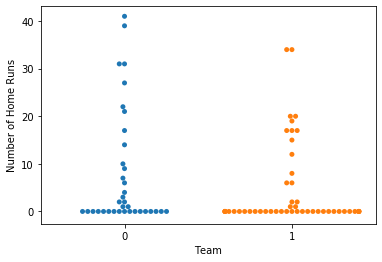

In [8]:
_ = sns.swarmplot(data=[astros_series, nationals_series])
_ = plt.xlabel('Team')
_ = plt.ylabel('Number of Home Runs')
plt.show()

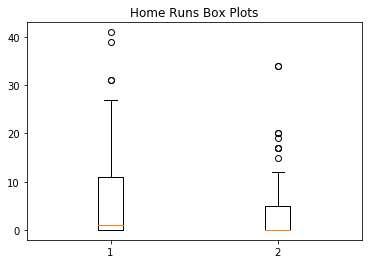

In [9]:
# Create a figure instance
teams = [astros_home_runs, nationals_home_runs]
fig1, ax1 = plt.subplots()
ax1.set_title('Home Runs Box Plots')
ax1.boxplot(teams)
plt.show()

### Determine if there is a difference in the mean of homeruns between both teams

#### Are the HR batting for the Astros and Nationals Different?

In [10]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

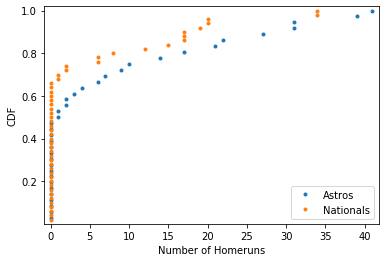

In [11]:
# Plot the Cummulative distribution Function for both teams
x_ast , y_ast = ecdf(astros_series)
x_nat , y_nat = ecdf(nationals_series)
_ = plt.plot(x_ast, y_ast, marker = '.', linestyle="none")
_ = plt.plot(x_nat, y_nat, marker = '.', linestyle="none")
plt.margins(0.02)
_ = plt.legend(('Astros', 'Nationals'), loc='lower right')
_ = plt.xlabel("Number of Homeruns")
_ = plt.ylabel('CDF')
plt.show()

### compere data to normal probability distribution function

In [12]:
# To Generate theoretical ecdf for these teams, must calculate mean, std
astros_mean = np.mean(astros_series)
nationals_mean = np.mean(nationals_series)
astros_std = np.std(astros_series)
nationals_std = np.std(nationals_series)
astros_norm = np.random.normal(astros_mean, astros_std, size=10000)
nationals_norm = np.random.normal(nationals_mean, nationals_std, size=10000)

In [13]:
# use the ecdf function to return the theoretical x and y for their normal pdf
ast_x_theor, ast_y_theor = ecdf(astros_norm)
nat_x_theor, anat_y_theor = ecdf(nationals_norm)

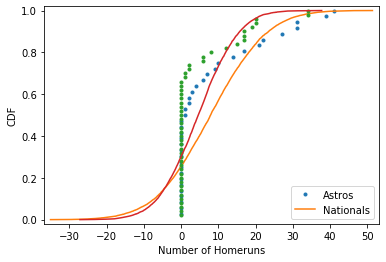

In [14]:
# Plot the Cummulative distribution Function for both teams
x_ast , y_ast = ecdf(astros_series)
x_nat , y_nat = ecdf(nationals_series)
_ = plt.plot(x_ast, y_ast, marker = '.', linestyle="none")
_ = plt.plot(ast_x_theor, ast_y_theor)
_ = plt.plot(x_nat, y_nat, marker = '.', linestyle="none")
_ = plt.plot(nat_x_theor, anat_y_theor)
plt.margins(0.02)
_ = plt.legend(('Astros', 'Nationals'), loc='lower right')
_ = plt.xlabel("Number of Homeruns")
_ = plt.ylabel('CDF')
plt.show()

In [15]:
from scipy.stats import ttest_ind
